<a href="https://colab.research.google.com/github/jae1001/PartII_C1/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression in Python using scipy package

Parameter values
[9.61763609 1.22380039 0.03278043]
Parameter standard errors
[0.57863418 0.16558433 0.27695979]


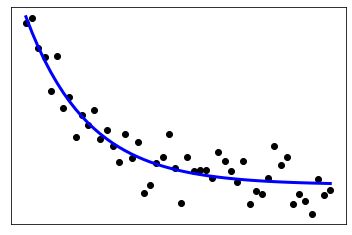

R^2 (coefficient of variation)
0.8684515387656843
Reduced chi-squared
1.0168907134607728


In [73]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define fitting functions
def edecay(x, a, b, c):
  return a*np.exp(-b*x) + c
def linear(x, a, b):
  return a*x + b
def quadratic(x, a, b, c):
  return a*x**2 + b*x + c
def cubic(x, a, b, c, d):
  return a*x**3 + b*x**2 + c*x + d
def sextic(x, a, b, c, d, e, f, g):
  return a*x**6 + b*x**5 + c*x**4 + d*x**3 + e*x**2 + f*x + g

# Generate some noisy data
xdata = np.linspace(0, 4, 50)
std_err = 1.0  # standard errror in y (fixed)
y = edecay(xdata, 10, 1.3, 0.5)
#y = linear(xdata, 1, 3)
ydata = y + std_err * np.random.normal(size=len(xdata))

# Fit function to data
popt, pcov = curve_fit(edecay, xdata, ydata)
perr = np.sqrt(np.diag(pcov))
ymodel = edecay(xdata,popt[0],popt[1],popt[2])

# Print parameters and standard errors
print("Parameter values")
print(popt)
print("Parameter standard errors")
print(perr)

# Plot data and fitted model
plt.scatter(xdata, ydata, color="black")
plt.plot(xdata, ymodel, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# Goodness-of-fit statistics
residuals = ydata - ymodel
ss_res = np.sum(residuals**2)
ss_tot = np.sum((ydata-np.mean(ydata))**2)
r_squared = 1 - (ss_res / ss_tot)

print("R^2 (coefficient of variation)")
print(r_squared)

dof = len(xdata)-len(popt)-1
red_chi = ss_res/((std_err**2)*dof)

print("Reduced chi-squared")
print(red_chi)
